# 线性模型和梯度下降
这是神经网络的第一课，我们会学习一个非常简单的模型，线性回归，同时也会学习一个优化算法-梯度下降法，对这个模型进行优化。线性回归是监督学习里面一个非常简单的模型，同时梯度下降也是深度学习中应用最广的优化算法，我们将从这里开始我们的深度学习之旅

In [1]:
import torch
import numpy as np
from torch.autograd import Variable

torch.manual_seed(2017) #torch.manual_seed

## 一. 一元线性回归模型

In [6]:
# 读入数据 x 和 y
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

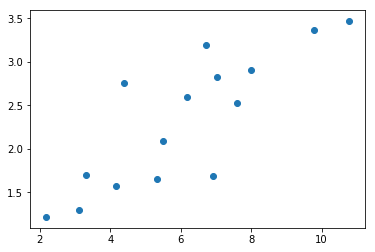

In [7]:
#画出图像
import matplotlib.pyplot as plt
plt.scatter(x_train,y_train)
plt.show()

In [8]:
# ndarray转换为Tensor
x_train= torch.Tensor(x_train)
y_train=torch.Tensor(y_train)

#定义参数w和b
w=Variable(torch.randn(1),requires_grad=True)
b=Variable(torch.randn(1),requires_grad=True)

### 构建线性回归模型

In [9]:
x_train=Variable(x_train)
y_train=Variable(y_train)

def linear_model(x):
    y_=x*w+b
    return y_
y_pred=linear_model(x_train)

经过上面的步骤我们就定义好了模型，在进行参数更新之前，我们可以先看看模型的输出结果长什么样

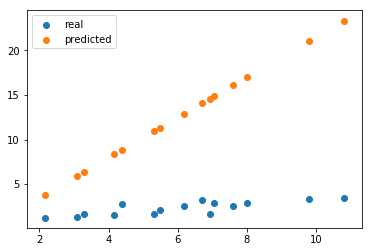

In [10]:
plt.scatter(x_train.data.numpy(),y_train.data.numpy(),label='real')
plt.scatter(x_train.data.numpy(),y_pred.data.numpy(),label='predicted')
plt.legend() #show的话不显示label名称

### 计算误差

In [11]:
def get_loss(y_pred,y_real):
    return torch.mean((y_pred-y_real)**2)
loss=get_loss(y_pred,y_train)

In [12]:
#打印一下看看loss的大小
print(loss)

tensor(128.8117, grad_fn=<MeanBackward1>)


### 反向自动求导

In [13]:
loss.backward()
#查看w和b的梯度
print(w.grad)
print(b.grad)

tensor([147.3155])
tensor([20.6158])


### 更新一次参数,看一下模型输出的结果

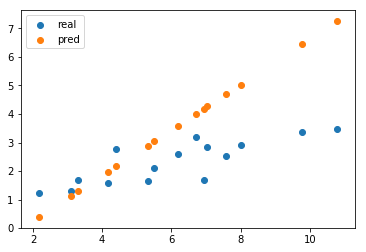

In [14]:
w.data=w.data - 1e-2*w.grad.data
b.data=b.data - 1e-2*b.grad.data
y_pred=linear_model(x_train)
plt.scatter(x_train.data.numpy(),y_train.data.numpy(),label='real')
plt.scatter(x_train.data.numpy(),y_pred.data.numpy(),label='pred')
plt.legend()

### 循环更新参数

In [15]:
for e in range(100):
    y_pred=linear_model(x_train)
    loss=get_loss(y_pred,y_train)
    w.grad.zero_() #梯度需要归零
    b.grad.zero_()
    
    loss.backward()
    w.data=w.data- 1e-2*w.grad.data
    b.data=b.data- 1e-2*b.grad.data
    
    print('epoch:{}, loss:{}'.format(e, loss.data))

epoch:0, loss:3.125429630279541
epoch:1, loss:0.7964361310005188
epoch:2, loss:0.7503958344459534
epoch:3, loss:0.7466204762458801
epoch:4, loss:0.7436421513557434
epoch:5, loss:0.7406939268112183
epoch:6, loss:0.737760603427887
epoch:7, loss:0.7348425388336182
epoch:8, loss:0.731939435005188
epoch:9, loss:0.7290513515472412
epoch:10, loss:0.7261778116226196
epoch:11, loss:0.7233193516731262
epoch:12, loss:0.7204752564430237
epoch:13, loss:0.7176458835601807
epoch:14, loss:0.7148309946060181
epoch:15, loss:0.7120305895805359
epoch:16, loss:0.709244430065155
epoch:17, loss:0.706472635269165
epoch:18, loss:0.7037149667739868
epoch:19, loss:0.7009716033935547
epoch:20, loss:0.6982423067092896
epoch:21, loss:0.6955268383026123
epoch:22, loss:0.6928253769874573
epoch:23, loss:0.690138041973114
epoch:24, loss:0.68746417760849
epoch:25, loss:0.6848042011260986
epoch:26, loss:0.6821576952934265
epoch:27, loss:0.679524838924408
epoch:28, loss:0.676905632019043
epoch:29, loss:0.6742995977401733


### 展示一下迭代后的结果

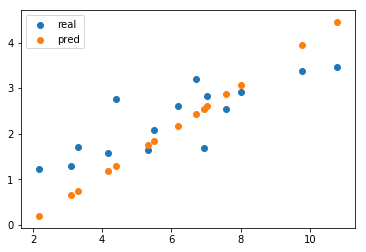

In [16]:
y_pred=linear_model(x_train)
plt.scatter(x_train.data.numpy(), y_train.data.numpy(),label='real')
plt.scatter(x_train.data.numpy(), y_pred.data.numpy(), label='pred')
plt.legend()

### 完整版

tensor(61.3291)
tensor(1.4631)
tensor(0.3543)
tensor(0.3330)
tensor(0.3318)
tensor(0.3309)
tensor(0.3301)
tensor(0.3293)
tensor(0.3284)
tensor(0.3276)
tensor(0.3268)
tensor(0.3260)
tensor(0.3252)
tensor(0.3244)
tensor(0.3236)
tensor(0.3228)
tensor(0.3220)
tensor(0.3212)
tensor(0.3204)
tensor(0.3197)
tensor(0.3189)
tensor(0.3181)
tensor(0.3174)
tensor(0.3166)
tensor(0.3158)
tensor(0.3151)
tensor(0.3143)
tensor(0.3136)
tensor(0.3128)
tensor(0.3121)
tensor(0.3114)
tensor(0.3106)
tensor(0.3099)
tensor(0.3092)
tensor(0.3085)
tensor(0.3078)
tensor(0.3070)
tensor(0.3063)
tensor(0.3056)
tensor(0.3049)
tensor(0.3042)
tensor(0.3035)
tensor(0.3028)
tensor(0.3022)
tensor(0.3015)
tensor(0.3008)
tensor(0.3001)
tensor(0.2994)
tensor(0.2988)
tensor(0.2981)
tensor(0.2975)
tensor(0.2968)
tensor(0.2961)
tensor(0.2955)
tensor(0.2948)
tensor(0.2942)
tensor(0.2935)
tensor(0.2929)
tensor(0.2923)
tensor(0.2916)
tensor(0.2910)
tensor(0.2904)
tensor(0.2898)
tensor(0.2891)
tensor(0.2885)
tensor(0.2879)
tensor(0.

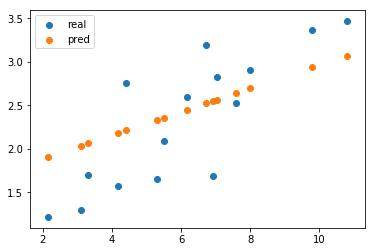

In [17]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)
x_train=Variable(torch.Tensor(x_train))
y_train=Variable(torch.Tensor(y_train))

def linear_model(x_train,w,b):
    y_pred=x_train*w+b
    return y_pred
w=Variable(torch.randn(1),requires_grad=True)
b=Variable(torch.randn(1),requires_grad=True)
for e in range(100):
    y_pred=linear_model(x_train,w,b)
    loss= torch.mean((y_pred-y_train)**2)
    print(loss.data)
    loss.backward()
    
    w.data=w.data-0.01*w.grad.data
    b.data=b.data-0.01*b.grad.data
    
    w.grad.zero_()
    b.grad.zero_()
plt.scatter(x_train.data.numpy(),y_train.data.numpy(), label='real')
plt.scatter(x_train.data.numpy(),y_pred.data.numpy(), label='pred')
plt.legend()

## 二. 多项式回归模式

In [18]:
# 定义一个多变量函数
w_target=np.array([0.5,3,2.4])
b_target=np.array([0.9])

f_des='y={:.2f}+{:.2f}*x+{:.2f}*x^2+{:.2f}*x^3'.format(b_target[0],w_target[0],w_target[1],w_target[2]) #打印出函数的式子
print(f_des)

y=0.90+0.50*x+3.00*x^2+2.40*x^3


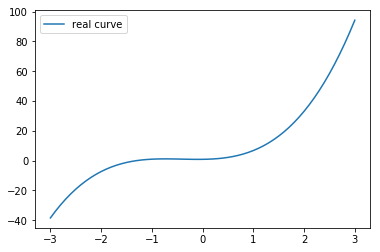

In [19]:
# 画出一个函数的曲线
x_sample=np.arange(-3,3.1,0.1)
y_sample=b_target[0]+ w_target[0]*x_sample + w_target[1]*x_sample**2+ w_target[2]*x_sample**3

plt.plot(x_sample,y_sample,label='real curve')
plt.legend()

In [21]:
# 构建数据 x和y
# x是一个如下矩阵[x, x^2, x^3]
# y是函数的结果 [y]
x_train=np.stack([x_sample**i for i in range(1,4)], axis=1) #分别做1,2,3次方操作

x_train=torch.Tensor(x_train).float()
y_train=torch.Tensor(y_sample).float()
y_train.unsqueeze_(1)

tensor([[-38.4000],
        [-33.8536],
        [-29.6648],
        [-25.8192],
        [-22.3024],
        [-19.1000],
        [-16.1976],
        [-13.5808],
        [-11.2352],
        [ -9.1464],
        [ -7.3000],
        [ -5.6816],
        [ -4.2768],
        [ -3.0712],
        [ -2.0504],
        [ -1.2000],
        [ -0.5056],
        [  0.0472],
        [  0.4728],
        [  0.7856],
        [  1.0000],
        [  1.1304],
        [  1.1912],
        [  1.1968],
        [  1.1616],
        [  1.1000],
        [  1.0264],
        [  0.9552],
        [  0.9008],
        [  0.8776],
        [  0.9000],
        [  0.9824],
        [  1.1392],
        [  1.3848],
        [  1.7336],
        [  2.2000],
        [  2.7984],
        [  3.5432],
        [  4.4488],
        [  5.5296],
        [  6.8000],
        [  8.2744],
        [  9.9672],
        [ 11.8928],
        [ 14.0656],
        [ 16.5000],
        [ 19.2104],
        [ 22.2112],
        [ 25.5168],
        [ 29.1416],


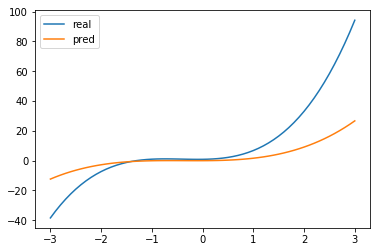

In [22]:
#画出更新之前的模型
y_pred=multi_linear(x_train)
plt.plot(x_train.data.numpy()[:,0],y_train.data.numpy(),label='real')#注意此处的[:,0]我们只要零次方的x,不需要高次方的
plt.plot(x_train.data.numpy()[:,0],y_pred.data.numpy(),label='pred')
plt.legend()

### 定义参数和模型,计算误差,自动求导, 反向传播求梯度, 得到结果图

step:0,loss:600.6475830078125
step:5,loss:120.02611541748047
step:10,loss:62.97459411621094
step:15,loss:42.38547897338867


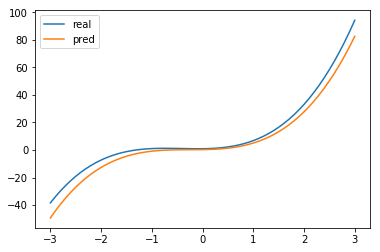

In [24]:
# 定义参数和模型
w=Variable(torch.randn(3,1),requires_grad=True)
b=Variable(torch.zeros(1),requires_grad=True)
x_train=Variable(x_train)
y_train=Variable(y_train)
def multi_linear(x):
    y_pred=torch.mm(x,w)+b
    return y_pred
for e in range(20):
    y_pred=torch.matmul(x_train,w)+b
    loss=torch.mean((y_pred-y_train)**2)
    loss.backward() #这一步要在求导之前
    w.data=w.data-0.001*w.grad.data
    b.data=b.data-0.001*b.grad.data
    w.grad.data.zero_()#归零操作, 此步操作只能在求导之后
    b.grad.data.zero_()
    if e%5==0:
        print('step:{},loss:{}'.format(e,loss.data.numpy()))
y_pred=multi_linear(x_train)
plt.plot(x_train.data.numpy()[:,0],y_train.data.numpy(),label='real')
plt.plot(x_train.data.numpy()[:,0],y_pred.data.numpy(),label='pred')
plt.legend()

我们可以看到, 多项式回归模型的学习效率是及其之高的,只需要20步,就可以完全拟合的差不多了,牛逼!

## 小结:
- `torch.mm(x,w)`:矩阵乘法,相当于`torch.matmul(x,w)`
